In [1]:
import numpy as np
import matplotlib.pyplot as plt
import myLogRegres as logreg

from utils import plot

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [3]:
plt.rcParams["figure.figsize"] = 10, 8

# Dummy data set

In [4]:
dataset, labels = logreg.load_data_set()

#### Plot it

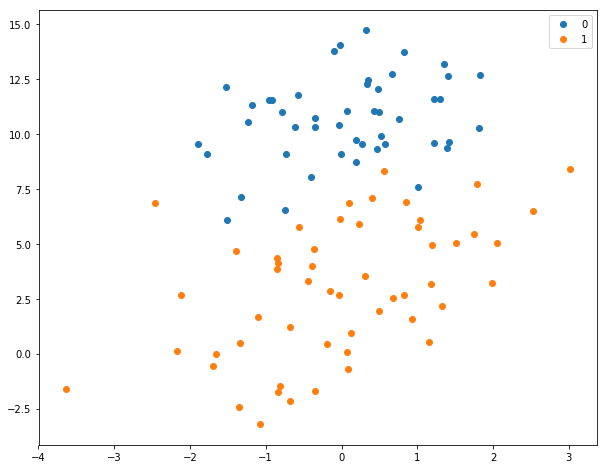

In [5]:
plot(dataset, labels, 1, 2)

#### Compute weights for gradient ascent

In [6]:
weights = logreg.gradient_ascent(dataset, labels, 1e-3, 500)

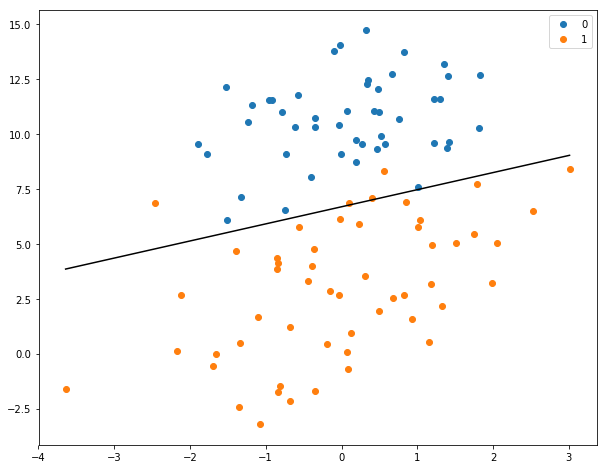

In [7]:
plot(dataset, labels, 1, 2)
logreg.plot_best_fit(weights, np.min(dataset[:, 1]), np.max(dataset[:, 1]))

#### Compute weights for stochastic gradient ascent

In [8]:
weights = logreg.stochastic_gradient_ascent(dataset, labels, 1e-2)

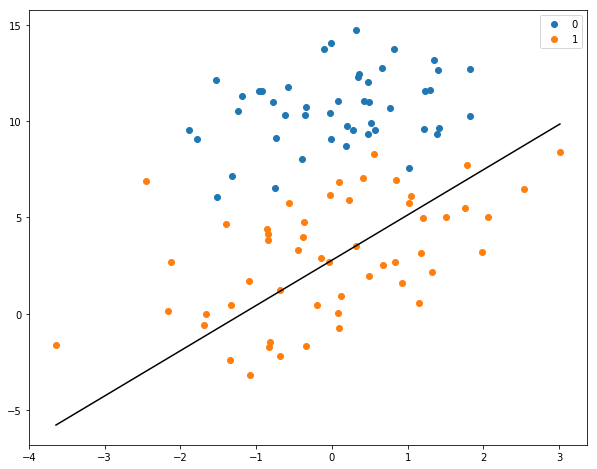

In [9]:
plot(dataset, labels, 1, 2)
logreg.plot_best_fit(weights, np.min(dataset[:, 1]), np.max(dataset[:, 1]))

#### Compute weights for upgraded stochastic gradient ascent

In [10]:
weights = logreg.stochastic_gradient_ascent_upgrade(dataset, labels, 150)

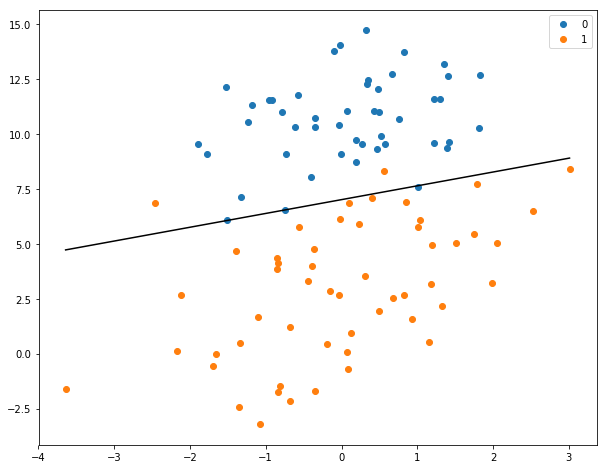

In [11]:
plot(dataset, labels, 1, 2)
logreg.plot_best_fit(weights, np.min(dataset[:, 1]), np.max(dataset[:, 1]))

In [12]:
weights = logreg.stochastic_gradient_ascent_upgrade(dataset, labels, 250)

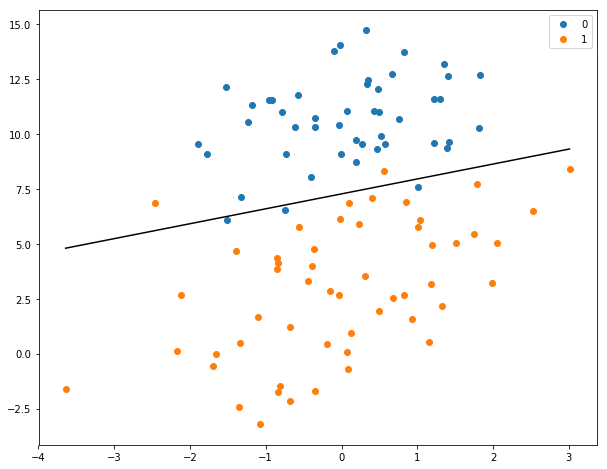

In [13]:
plot(dataset, labels, 1, 2)
logreg.plot_best_fit(weights, np.min(dataset[:, 1]), np.max(dataset[:, 1]))

# Horse colic data set

In [14]:
train_dataset, train_labels, test_dataset, test_labels = logreg.load_horse_colic_data_set()

#### Display data

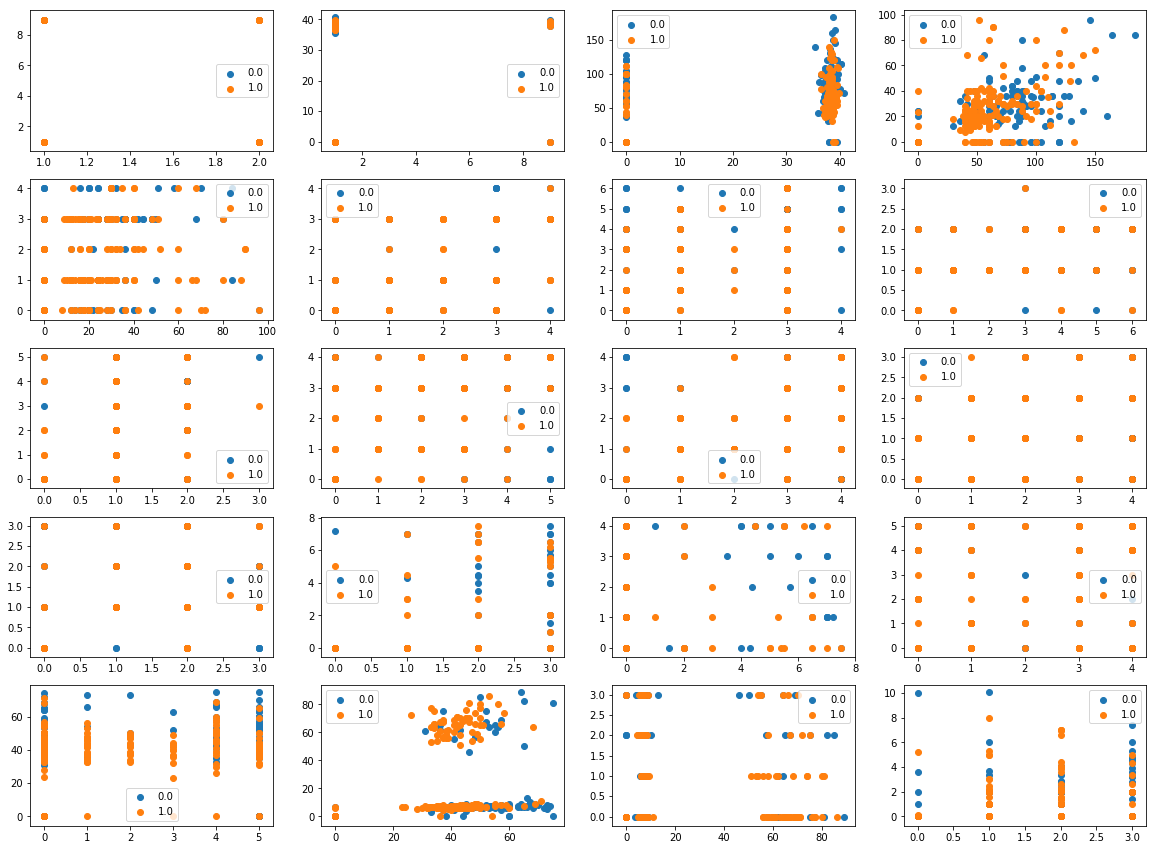

In [15]:
plt.figure().set_size_inches(20,15)
for i in range(20):
    plt.subplot(5, 4, i+1)
    plot(train_dataset, train_labels, i, i+1)

#### Test classifier

In [16]:
logreg.test_horse_colic()

/Users/Gonzalo/github/machinelearninginaction/Ch05/myLogRegres.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


47.76119402985075

#### Better estimate

In [17]:
np.mean([logreg.test_horse_colic() for i in range(20)])

/Users/Gonzalo/github/machinelearninginaction/Ch05/myLogRegres.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


34.477611940298509

#### Error rate as a function of the number of iterations

/Users/Gonzalo/github/machinelearninginaction/Ch05/myLogRegres.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


100
150
200
250
300
350
400
450
500


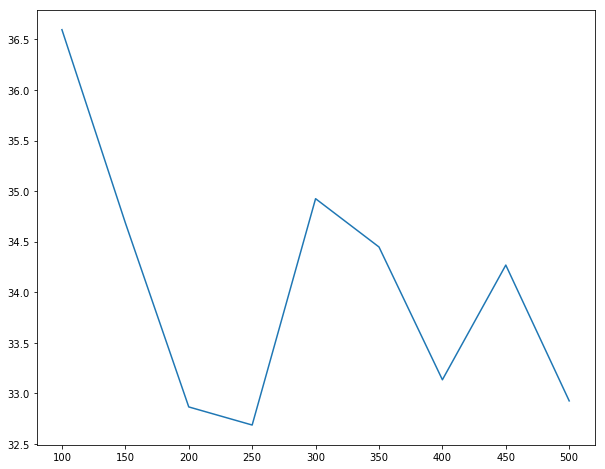

In [18]:
n_iter = np.arange(100, 550, 50)
e_rate = []
for n in n_iter:
    e = np.mean([logreg.test_horse_colic(n) for i in range(50)])
    e_rate.append(e)
    print(n)
plt.plot(n_iter, e_rate)